# Naive Bayes classifiers from scratch

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [59]:
class  NaiveBayes:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.prior = { c: 0 for c in y.unique() }
        self.evidence = { f: { c: 0 for c in X[f].unique() } for f in X.columns }
        self.likelihood = [{ f: { c: 0 for c in X[f].unique() } for f in X.columns }, { f: { c: 0 for c in X[f].unique() } for f in X.columns }]
        self.class_lengths = None
    
    def calculate_prior(self):
        classes = y.unique()
        for i in self.X.index:
            self.prior[y[i]] += 1
            
        self.class_lengths = [self.prior[0], self.prior[1]]
        for i in self.prior.keys():
            self.prior[i] = self.prior[i] / len(self.X)
        
    def calculate_evidence(self):
        for i in self.X.index:
            for feat in self.X.columns:
                self.evidence[feat][self.X[feat][i]] += 1
        for i in self.evidence.keys():
            for j in self.evidence[i].keys():
                self.evidence[i][j] = self.evidence[i][j] / len(self.X[i])
        
    def calculate_likelihood(self):
        for i in self.X.index:
            for feat in self.X.columns:
                if self.y[i] == 0:
                    self.likelihood[0][feat][self.X[feat][i]] += 1
                elif self.y[i] == 1:
                    self.likelihood[1][feat][self.X[feat][i]] += 1
                    
        for i in range(0,2):
            for feat in self.likelihood[i].keys():
                for j in self.likelihood[i][feat].keys():
                    self.likelihood[i][feat][j] = self.likelihood[i][feat][j] / self.class_lengths[i]
                    
    def fit(self):
        self.calculate_prior()
        self.calculate_evidence()
        self.calculate_likelihood()
        
    def predict(self, X_test):
        preds = []
        for i in X_test.index:
            prob0 = 0
            prob1 = 0
            for feat in X_test.columns:
                prob0 += (self.likelihood[0][feat][X_test[feat][i]] * self.prior[0]) / self.evidence[feat][X_test[feat][i]]
                prob1 += (self.likelihood[1][feat][X_test[feat][i]] * self.prior[1]) / self.evidence[feat][X_test[feat][i]]
            pred = 0 if prob0 > prob1 else 1
            preds.append(pred)
        return preds
    

In [18]:
titanic_data = pd.read_csv("Titanic-Dataset.csv")
titanic_data.drop("Name", axis=1, inplace=True)
titanic_data.drop("Ticket", axis=1, inplace=True)
titanic_data.drop("PassengerId", axis=1, inplace=True)
titanic_data.drop("Cabin", axis=1, inplace=True)
titanic_data.drop("Age", axis=1, inplace=True)
titanic_data.drop("Fare", axis=1, inplace=True)
titanic_data.dropna(axis=0, inplace=True)
sex_map = { "female": 0, "male": 1 }
emb_map = { "S": 0, "C": 1, "Q": 2 }
for i in titanic_data.index:
    titanic_data["Sex"][i] = sex_map[titanic_data["Sex"][i]]
    titanic_data["Embarked"][i] = emb_map[titanic_data["Embarked"][i]]
titanic_data

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,1,1,0,0
1,1,1,0,1,0,1
2,1,3,0,0,0,0
3,1,1,0,1,0,0
4,0,3,1,0,0,0
...,...,...,...,...,...,...
886,0,2,1,0,0,0
887,1,1,0,0,0,0
888,0,3,0,1,2,0
889,1,1,1,0,0,1


In [21]:
X, y = titanic_data.drop("Survived", axis=1), titanic_data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=120)

In [61]:
nb = NaiveBayes(X_train, y_train)
nb.fit()

Predicted Classes:
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]
True Classes: 
[0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 

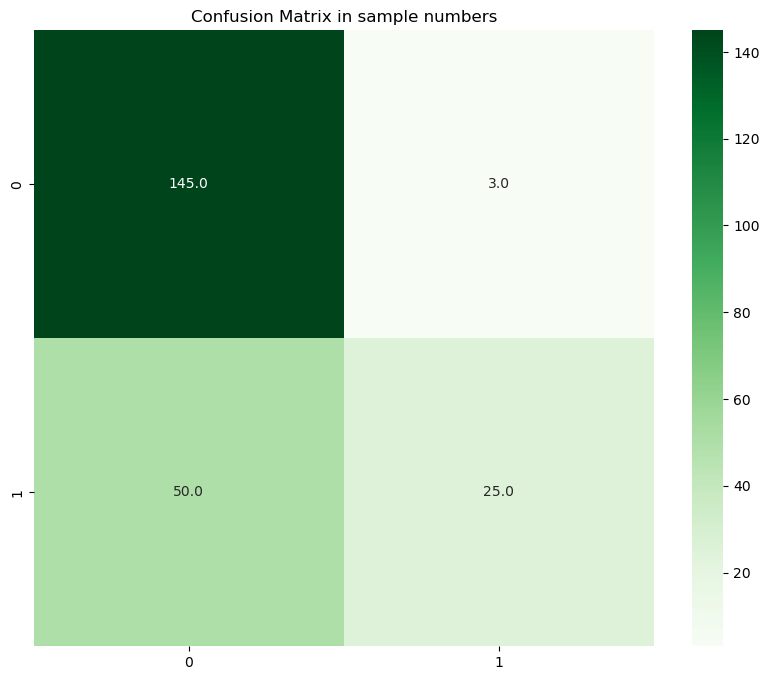

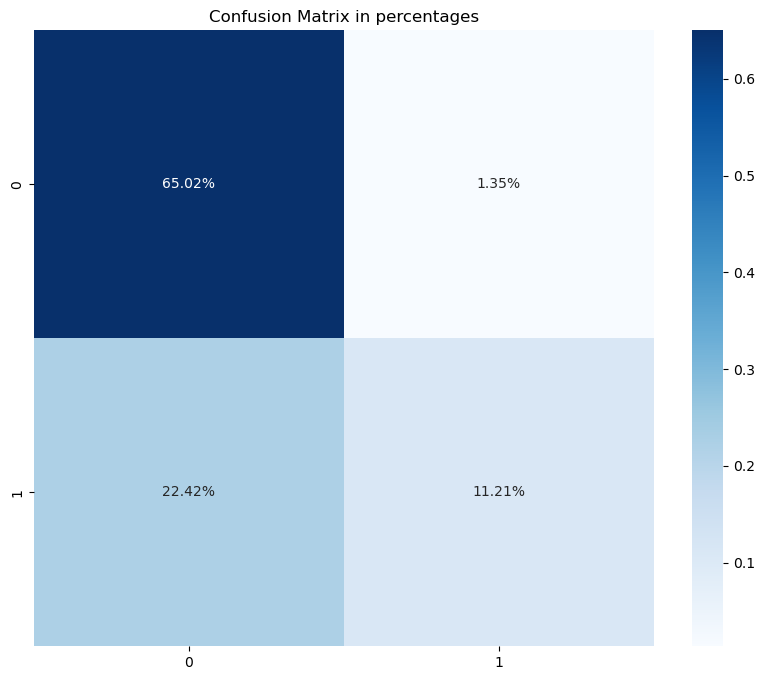

In [82]:
y_preds = nb.predict(X_test)
print("Predicted Classes:")
print(y_preds)
print("True Classes: ")
print(y_test.values)
print("Accuracy Score: ", accuracy_score(y_preds, y_test))
cf_matrix = confusion_matrix(y_test, y_preds)
print("Confusion Matrix: ")
print(cf_matrix)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=True, fmt=".1f", ax=ax, cmap="Greens")
ax.set_title("Confusion Matrix in sample numbers")
plt.show()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', ax=ax)
ax.set_title("Confusion Matrix in percentages")
plt.show()